In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
from finquant.portfolio import build_portfolio
import scipy.optimize as opt
import matplotlib.pyplot as plt

In [3]:
names = ['GOOG', 'AMZN', 'MCD', 'DIS']
start_date = '2015-01-01'
end_date = '2017-12-31'
pf = build_portfolio(names=names,
                    start_date=start_date,
                    end_date=end_date, data_api="yfinance")

[*********************100%***********************]  4 of 4 completed


In [4]:
pf.comp_cumulative_returns()

,GOOG,AMZN,MCD,DIS
Date,,,,
2015-01-02,0.000000,0.000000,0.000000,0.000000
2015-01-05,-0.020846,-0.020517,-0.011044,-0.014613
2015-01-06,-0.043540,-0.042882,-0.009221,-0.019840
2015-01-07,-0.045178,-0.032737,0.008042,-0.009813
2015-01-08,-0.042168,-0.026125,0.011795,0.000427
...,...,...,...,...
2017-12-22,1.025553,2.786983,1.010559,0.209506
2017-12-26,1.019095,2.814210,1.009034,0.203384
2017-12-27,1.005013,2.832037,1.025220,0.198042


In [28]:
# tickers = ["FB", "AMZN", "AAPL", "NFLX", "GOOG"]
tickers = ["RCL", "AAL", "MSFT", "BAC", "SNAP", "AMZN", "KO", "DIS", "COST", "VZ", "AMD", "NVDA", "WMT", "V", "HD", "DPZ", "JBLU", "MDLZ", "TSLA", "WEN", "UPS", "PLUG", "PLTR", "SNE"]
data = yf.download(tickers, start="2017-01-01")
rets = data["Adj Close"].pct_change()
rets

[*********************100%***********************]  24 of 24 completed


,AAL,AMD,AMZN,BAC,COST,DIS,DPZ,HD,JBLU,KO,...,PLUG,RCL,SNAP,SNE,TSLA,UPS,V,VZ,WEN,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,0.008639,0.000000,0.004657,0.018642,0.000188,0.012820,0.029237,0.008860,0.011612,-0.003589,...,0.074380,0.007512,NaN,0.010251,0.046085,0.000261,0.008176,-0.001099,0.015648,0.005826
2017-01-05,-0.017345,-0.016623,0.030732,-0.011765,0.019717,-0.000558,-0.001350,-0.011808,-0.016777,0.002401,...,-0.030769,0.005917,NaN,0.004899,-0.001057,0.000521,0.011728,0.002201,0.000734,0.002172
2017-01-06,0.006973,0.007117,0.019912,0.000000,-0.000491,0.014900,0.004424,-0.002763,-0.019758,-0.000240,...,-0.007937,-0.007882,NaN,0.008356,0.009967,0.001997,0.013812,-0.014835,-0.028592,-0.013726
2017-01-09,0.018827,0.015018,0.001168,-0.005732,-0.011423,-0.005689,0.006239,0.005841,0.010078,-0.010062,...,0.000000,0.002609,NaN,-0.004834,0.009912,-0.005459,-0.005595,-0.010890,0.013585,0.006592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,0.044055,0.032020,0.020390,0.005870,-0.012752,0.006830,0.006286,-0.012041,0.014300,-0.014871,...,0.046819,0.013169,-0.020881,-0.009278,0.012065,-0.017602,0.001478,-0.006283,-0.017257,-0.014224
2021-04-27,-0.012704,-0.002342,0.002473,0.011926,0.004586,0.002008,0.002049,0.001875,-0.021876,-0.001491,...,-0.025265,0.007936,0.008164,-0.020657,-0.045326,0.104203,-0.001867,-0.010889,0.003152,0.003408
2021-04-28,-0.002757,-0.013966,0.012018,0.003761,-0.001675,-0.006770,0.007281,-0.002745,-0.004970,0.000187,...,0.010858,-0.001826,0.025285,-0.020437,-0.014672,0.021841,0.015397,0.001953,-0.000449,-0.003541


In [30]:
train = rets.loc[:"2021-01-01"]
test = rets.loc["2021-01-01":]
train.loc[pd.Timestamp(2017,1,9)]

AAL     0.018827
AMD     0.015018
AMZN    0.001168
BAC    -0.005732
COST   -0.011423
DIS    -0.005689
DPZ     0.006239
HD      0.005841
JBLU    0.010078
KO     -0.010062
MDLZ   -0.008211
MSFT   -0.003183
NVDA    0.040543
PLTR         NaN
PLUG    0.000000
RCL     0.002609
SNAP         NaN
SNE    -0.004834
TSLA    0.009912
UPS    -0.005459
V      -0.005595
VZ     -0.010890
WEN     0.013585
WMT     0.006592
Name: 2017-01-09 00:00:00, dtype: float64

In [7]:
mu_train = train.mean()
cov_train = train.cov()

def get_ret_vol_sr(weights):
        """
        Calculates the returns, volatility, and sharpe of a portfolio with given weights
        """
        weights = np.array(weights)
        ret = np.sum(mu_train * weights) * 252
        vol = np.sqrt(np.dot(weights.T, np.dot(cov_train*252, weights)))
        sr = ret/vol
        return np.array([ret, vol, sr])

def neg_sharpe(weights):
    return get_ret_vol_sr(weights)[2] * -1

def neg_returns(weights):
    return get_ret_vol_sr(weights)[0] * -1

def minimize_volatility(weights):
    return get_ret_vol_sr(weights)[1]

In [8]:
cons = ({'type':'eq', 'fun': lambda x: np.sum(x)-1})
bounds = opt.Bounds(0,1)
init_guess = [1/len(tickers) for _ in range(len(tickers))]

opt_results = opt.minimize(neg_sharpe, init_guess, method='SLSQP', bounds=bounds, constraints=cons)
opt_results.x

array([2.11548971e-14, 0.00000000e+00, 1.38987339e-14, 0.00000000e+00,
       0.00000000e+00, 1.75190283e-01, 0.00000000e+00, 2.67430850e-16,
       0.00000000e+00, 1.73531959e-01, 0.00000000e+00, 1.01483103e-14,
       3.35248146e-14, 4.12819275e-02, 7.39186180e-02, 2.51464427e-14,
       1.30258225e-01, 3.52507434e-01, 5.33115534e-02, 1.86739130e-15,
       2.83328305e-15, 0.00000000e+00, 3.51193202e-15, 2.39714104e-16])

In [9]:
d = {}
for i, (ticker, allocation) in enumerate(zip(rets.columns, opt_results.x)):
    if (allocation*100).round(2) != 0:
        d[i] = {"Name": ticker, "Allocation":(allocation*100).round(2)}
# If you wish to use Yahoo Finance as source, you must remove "WIKI/" from the stock names/tickers


pf_allocation = pd.DataFrame.from_dict(d, orient="index").reset_index()
pf_allocation

,index,Name,Allocation
0,5,DIS,17.52
1,9,KO,17.35
2,13,PLTR,4.13
3,14,PLUG,7.39
4,16,SNAP,13.03
5,17,SNE,35.25
6,18,TSLA,5.33


In [15]:
port = build_portfolio(data=data["Adj Close"].loc[pd.Timestamp(2015,1,1):], pf_allocation=pf_allocation)

In [25]:
data["Adj Close"].loc[pd.Timestamp(year=2015,month=1,day=7):]

,AAL,AMD,AMZN,BAC,COST,DIS,DPZ,HD,JBLU,KO,...,PLUG,RCL,SNAP,SNE,TSLA,UPS,V,VZ,WEN,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,44.741226,11.430000,753.669983,20.636000,143.091187,101.584358,152.285294,121.338829,22.389999,36.331627,...,1.210000,77.689911,NaN,27.585791,43.397999,100.447105,77.321976,44.711304,12.407415,62.766037
2017-01-04,45.127758,11.430000,757.179993,21.020697,143.118103,102.886719,156.737671,122.413910,22.650000,36.201244,...,1.300000,78.273483,NaN,27.868574,45.397999,100.473297,77.954185,44.662155,12.601571,63.131706
2017-01-05,44.345032,11.240000,780.450012,20.773388,145.939972,102.829262,156.526123,120.968430,22.270000,36.288166,...,1.260000,78.736633,NaN,28.005089,45.349998,100.525658,78.868431,44.760460,12.610815,63.268814
2017-01-06,44.654255,11.320000,795.989990,20.773388,145.868332,104.361458,157.218521,120.634171,21.830000,36.279465,...,1.250000,78.116005,NaN,28.239111,45.801998,100.726425,79.957748,44.096455,12.250241,62.400372
2017-01-09,45.494972,11.490000,796.919983,20.654318,144.202026,103.767731,158.199387,121.338829,22.049999,35.914421,...,1.250000,78.319801,NaN,28.102602,46.256001,100.176529,79.510353,43.616238,12.416661,62.811741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,22.040001,85.410004,3409.000000,39.410000,367.732269,184.270004,400.209991,319.989990,20.570000,53.660000,...,29.290001,86.940002,60.020000,108.919998,738.200012,175.809998,230.339996,56.939999,22.209999,137.910004
2021-04-27,21.760000,85.209999,3417.429932,39.880001,369.418671,184.639999,401.029999,320.589996,20.120001,53.580002,...,28.549999,87.629997,60.509998,106.669998,704.739990,194.130005,229.910004,56.320000,22.280001,138.380005
2021-04-28,21.700001,84.019997,3458.500000,40.029999,368.800018,183.389999,403.950012,319.709991,20.020000,53.590000,...,28.860001,87.470001,62.040001,104.489998,694.400024,198.369995,233.449997,56.430000,22.270000,137.889999


In [103]:
port.properties()

----------------------------------------------------------------------
Stocks: DIS, KO, PLTR, PLUG, SNAP, SNE, TSLA
Time window/frequency: 252
Risk free rate: 0.005
Portfolio Expected Return: 0.307
Portfolio Volatility: 0.278
Portfolio Sharpe Ratio: 1.090

Skewness:
        DIS        KO      PLTR      PLUG      SNAP       SNE      TSLA
0 -0.421381  0.337276  1.333868  0.229467 -0.027693  0.051518  0.108823

Kurtosis:
        DIS        KO     PLTR      PLUG      SNAP       SNE      TSLA
0 -0.306946 -1.120971  0.66429 -1.411616 -0.910519 -0.851086 -1.102168

Information:
   Allocation  Name  index
0       17.52   DIS    5.0
1       17.35    KO    9.0
2        4.13  PLTR   13.0
3        7.39  PLUG   14.0
4       13.03  SNAP   16.0
5       35.25   SNE   17.0
6        5.33  TSLA   18.0
----------------------------------------------------------------------


In [104]:
np.array(port.comp_weights())

array([0.1752, 0.1735, 0.0413, 0.0739, 0.1303, 0.3525, 0.0533])

<AxesSubplot:xlabel='Date'>

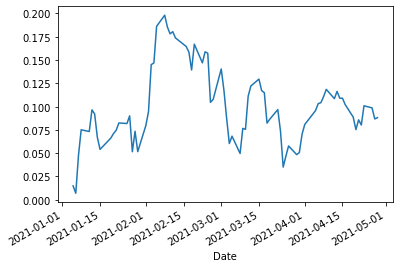

In [105]:
w = np.array(port.comp_weights())
port_rets = port.comp_daily_returns().apply(lambda x: w@x, axis=1)
((1 + port_rets).cumprod() - 1).plot()

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

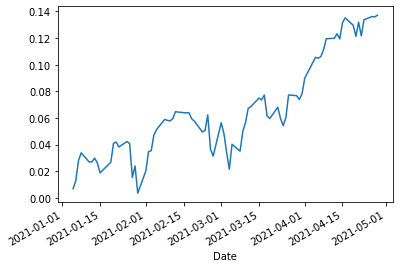

In [106]:
spy_rets = yf.download("SPY", start="2021-01-01")["Adj Close"].pct_change().dropna()
((1 + spy_rets).cumprod() - 1).plot()

In [107]:
spy_rets.mean()/spy_rets.std()

0.18360166356659524

<AxesSubplot:xlabel='Date'>

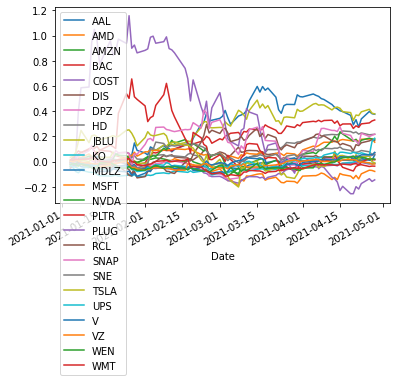

In [108]:
((1 + rets.loc["2021-01-01":]).cumprod() - 1).plot()

In [41]:
rets.FB

Date
2017-01-04    0.015660
2017-01-05    0.016682
2017-01-06    0.022707
2017-01-09    0.012074
2017-01-10   -0.004404
                ...   
2021-04-22   -0.016420
2021-04-23    0.015547
2021-04-26    0.006343
2021-04-27    0.001749
2021-04-28    0.006259
Name: FB, Length: 1086, dtype: float64

In [110]:
t = port.ef_efficient_frontier()

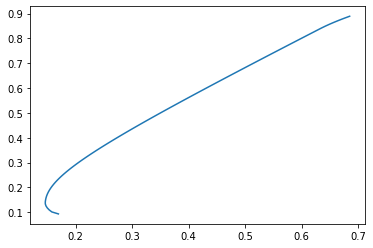

In [114]:
plt.plot(t[:,0], t[:,1])